In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("benchmark_results/2023-01-08_03:08:31.712434.csv", header=None)

In [3]:
data.columns = ["dataloader", "iteration", "batch_size", "num_workers", "clock_time", "process_time", "clip_count"]

In [4]:
clock_by_combo = data.groupby("dataloader").agg({
    "clock_time":"mean",
    "clip_count":"sum",
})

In [5]:
clock_by_combo

,clock_time,clip_count
dataloader,,
dali,69.782383,2688
dali_dali,71.209037,2712
dali_pytorch,74.402721,3024
pytorch,101.406163,3120


In [6]:
clock_by_combo.index.size

4

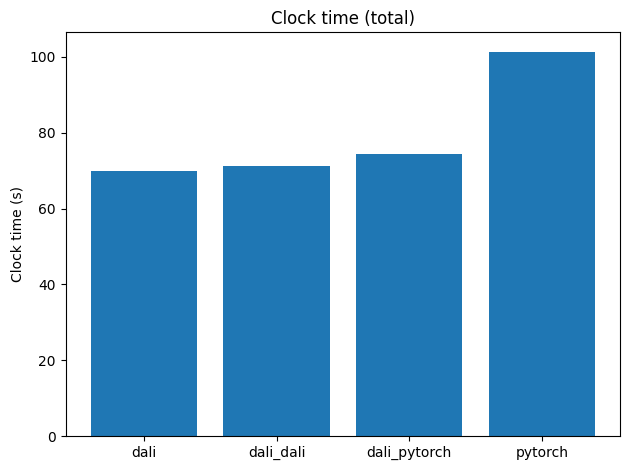

In [7]:
width = 0.1

x = np.arange(clock_by_combo.index.size)

fig, ax = plt.subplots()

rects = []

ax.bar(x, clock_by_combo.clock_time)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Clock time (s)')
ax.set_title('Clock time (total)')
labels = clock_by_combo.index
ax.set_xticks(x, labels)

fig.tight_layout()

plt.show()

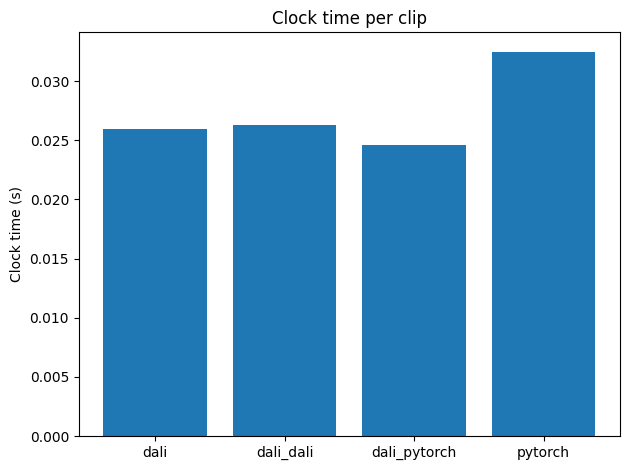

In [8]:
width = 0.1

x = np.arange(clock_by_combo.index.size)

fig, ax = plt.subplots()

rects = []

ax.bar(x, clock_by_combo.clock_time / clock_by_combo.clip_count)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Clock time (s)')
ax.set_title('Clock time per clip')
labels = clock_by_combo.index
ax.set_xticks(x, labels)

fig.tight_layout()

plt.show()

# Adjusting portions

In [9]:
portioned_data = pd.read_csv("benchmark_results/2023-01-09_06:48:28.652273.csv")

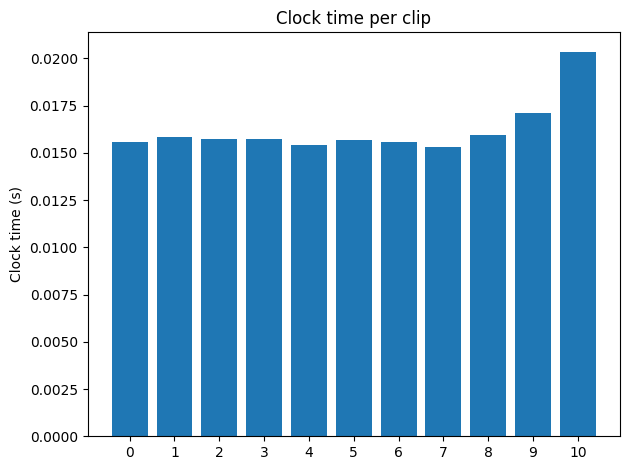

In [10]:
width = 0.1

data_by_portion = portioned_data.groupby("pytorch_portion").agg({
    "clock_time":"mean",
    "clips":"sum",
})
x = np.arange(data_by_portion.index.size)

fig, ax = plt.subplots()

rects = []

ax.bar(x, data_by_portion.clock_time / data_by_portion.clips)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Clock time (s)')
ax.set_title('Clock time per clip')
labels = data_by_portion.index
ax.set_xticks(x, labels)

fig.tight_layout()

plt.show()

In [11]:
portioned_data_updated = pd.read_csv("benchmark_results/2023-01-08_05:52:13.730692.csv")

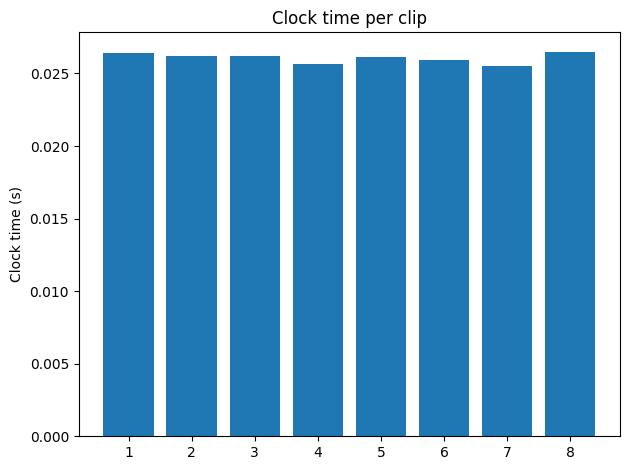

In [12]:
width = 0.1

data_by_portion = portioned_data_updated.groupby("pytorch_portion").agg({
    "clock_time":"mean",
    "clips":"sum",
})
x = np.arange(data_by_portion.index.size)

fig, ax = plt.subplots()

rects = []

ax.bar(x, data_by_portion.clock_time / data_by_portion.clips)
#ax.bar(x, data_by_portion.clock_time)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Clock time (s)')
ax.set_title('Clock time per clip')
labels = data_by_portion.index
ax.set_xticks(x, labels)

fig.tight_layout()

plt.show()

### Queue size throughout run

In [16]:
py_queue_data = pd.read_csv("benchmark_results/2023-01-11_20:48:14.722385_DataLoaderType.PYTORCH.csv", header=None)
dali_queue_data = pd.read_csv("benchmark_results/2023-01-11_20:48:14.721470_DataLoaderType.DALI.csv", header=None)

In [26]:
dali_queue_data[0] = pd.to_datetime(dali_queue_data[0])
py_queue_data[0] = pd.to_datetime(py_queue_data[0])

fig1, ax1 = plt.subplots()
ax1.scatter(dali_queue_data[0], dali_queue_data[1], label="dali")
ax1.scatter(py_queue_data[0], py_queue_data[1], label="pytorch")
ax1.legend()

The queue size trend should be approximately the same for both pytorch and dali, since they were both adding to the same queue, but they added across different times.

It is interesting how there are blocks where pytorch will put a lot in the queue and then dali will add a lot.

The 50:50 ratio of assigning videos to dali and pytorch led to pytorch adding batches to the queue after dali had already finished. Why are the adds grouped in this way?

To consider: what percent of the queue at each point in time is batches from pytorch, and what percent is batchces from dali?

#### after removing sleep...

In [45]:
py_queue_data = pd.read_csv("benchmark_results/2023-01-11_21:57:27.170548_DataLoaderType.PYTORCH.csv", header=None)
dali_queue_data = pd.read_csv("benchmark_results/2023-01-11_21:57:27.169399_DataLoaderType.DALI.csv", header=None)
queue_pull_data = pd.read_csv("benchmark_results/2023-01-11_21:57:27.169758_QUEUE_PULLS.csv", header=None)

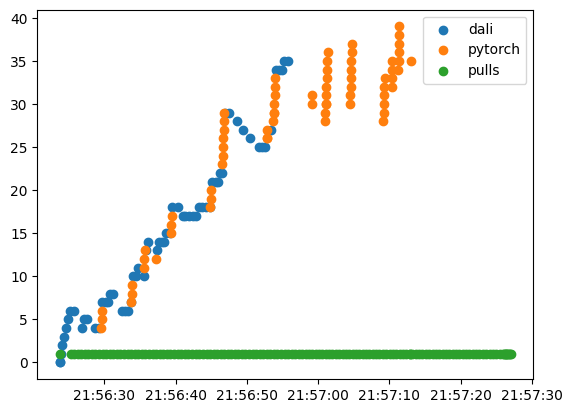

In [51]:
dali_queue_data[0] = pd.to_datetime(dali_queue_data[0])
py_queue_data[0] = pd.to_datetime(py_queue_data[0])
queue_pull_data[0] = pd.to_datetime(queue_pull_data[0])
queue_afters = queue_pull_data[lambda x: x[1] == "after"]

fig1, ax1 = plt.subplots()
ax1.scatter(dali_queue_data[0], dali_queue_data[1], label="dali")
ax1.scatter(py_queue_data[0], py_queue_data[1], label="pytorch")
ax1.scatter(queue_afters[0], [1 for i in range(queue_afters[0].size)], label="pulls")
ax1.legend()

In [47]:
queue_pull_data

,0,1
0,2023-01-11 21:56:19.695074,before
1,2023-01-11 21:56:23.769045,after
2,2023-01-11 21:56:25.258696,before
3,2023-01-11 21:56:25.259382,after
4,2023-01-11 21:56:25.753945,before
...,...,...
269,2023-01-11 21:57:26.811052,after
270,2023-01-11 21:57:26.932217,before
271,2023-01-11 21:57:26.932314,after
272,2023-01-11 21:57:27.053956,before
